In [22]:
import numpy as np
import tensorflow as tf

In [23]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [63]:
data_dir = 'classification-exam-fisi-3650-2/chest_xray_dataset/train'
batch_size = 16
img_height = 256
img_width = 256

In [64]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5216 files belonging to 2 classes.
Using 3652 files for training.


In [65]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'validation',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 5216 files belonging to 2 classes.
Using 1564 files for validation.


In [66]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [67]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [68]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [69]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [70]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
229/229 [==============================] - 40s 97ms/step - loss: 0.3812 - accuracy: 0.8842 - val_loss: 0.1202 - val_accuracy: 0.9616
Epoch 2/10
229/229 [==============================] - 13s 56ms/step - loss: 0.1124 - accuracy: 0.9592 - val_loss: 0.1254 - val_accuracy: 0.9552
Epoch 3/10
229/229 [==============================] - 13s 55ms/step - loss: 0.0661 - accuracy: 0.9754 - val_loss: 0.1650 - val_accuracy: 0.9373
Epoch 4/10
229/229 [==============================] - 13s 55ms/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 0.0929 - val_accuracy: 0.9680
Epoch 5/10
229/229 [==============================] - 13s 56ms/step - loss: 0.0445 - accuracy: 0.9836 - val_loss: 0.1279 - val_accuracy: 0.9648
Epoch 6/10
229/229 [==============================] - 13s 56ms/step - loss: 0.0393 - accuracy: 0.9841 - val_loss: 0.0867 - val_accuracy: 0.9731
Epoch 7/10
229/229 [==============================] - 13s 55ms/step - loss: 0.0289 - accuracy: 0.9890 - val_loss: 0.1247 - val_accuracy:

In [71]:
model.save('model.h5')

[ 2.15 97.85]
 ['NORMAL', 'PNEUMONIA']
Prediction:  PNEUMONIA 97.8524386882782%


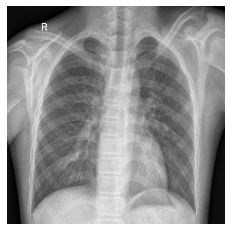

In [72]:
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('model.h5')

classes = ['NORMAL', 'PNEUMONIA']

path = 'classification-exam-fisi-3650-2/chest_xray_dataset/test/NORMAL_IM-0011-0001-0001.jpeg'

img = tf.keras.preprocessing.image.load_img(path, target_size=(img_height, img_width)) 
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

plt.imshow(img)
plt.axis('off')
print(f"{(predictions[0]*100).round(2)}\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

In [75]:
!python eval.py

2022-07-15 23:47:54.932658: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-07-15 23:47:55.868984: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.
2022-07-15 23:47:56.000243: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.
You got 88.78% accuracy
